# ZH A csoport - Összesen 10 pont - 90 perc áll rendelkezésre a megoldáshoz

## Azonosító adatok

In [ ]:
# NÉV: Stancz Boglár Anna   
# NEPTUN KÓD: FSSHJO
# 9 pont

## Feladatok

### 1. Feladat (1 pont)

Adja meg az alábbi probléma jellemzőit, illetve cél és kezdő állapotát:
- Egy vödörben 12 liter vodkát kell elosztani két orosz paraszt Igor és Sasha között.
- Igor jobban bírja az alkoholt ezért neki 8 liter-t kell adni amíg Sasha-nak 4 litert
- Igornak 9 literes palackja van míg Sasha-nak csak 5 literes.

In [1]:
P = <A, a0, C, O>
A - állapottér: 3 vödör: a1, a2, a3 (12,8,5 literes)
a0 - kezdőállapot: (12,0,0)
C - célállapot: (0,8,4)
O - operátorok

SyntaxError: invalid syntax (1533306577.py, line 1)

In [ ]:
# 1 pont

### 2. Feladat (2 pont)

Add meg a szélességi keresés implementációját pythonban!

In [1]:
from collections import deque
def szelesssegi(problem):
    frontier = deque([Node(problem.initial)])

    while frontier:
        node = frontier.popleft()
        if problem.goal_test(node.state):
            return node
        
        frontier.extend(node.expand(problem))
        print(node.state)

In [ ]:
# 2 pont

### 3. Feladat  (3 pont)

Készíts elő egy tanítási folyamtot egy neurális hálózat számára.

In [2]:
import pandas as pd
from tqdm import tqdm

import matplotlib.pyplot as plt
import numpy as np

   V1  V2  V3  V4  V5  V6  V7  V8  V9  V10  ...  V776  V777  V778  V779  V780  \
0   0   0   0   0   0   0   0   0   0   22  ...     0     0     1     0     0   
1   0   0   0   0   0   0   0   0   0    0  ...     0     0    91    97    80   
2   0   0   0   0   0   0   0   0   0    0  ...     0     0     0     0     0   
3   0   0   0   0   0   0   0   0   1    2  ...     0     0     0     0     0   
4   0   0   0   0   0   0   0   0   0    0  ...     0     0     0     0     0   

   V781  V782  V783  V784  y  
0     3     0     0     0  6  
1    78     0     0     0  9  
2     0     0     0     0  9  
3     0     0     0     0  4  
4     0     0     0     0  1  

[5 rows x 785 columns] (1000, 785)
      0
0  1000
1   785
1000 785


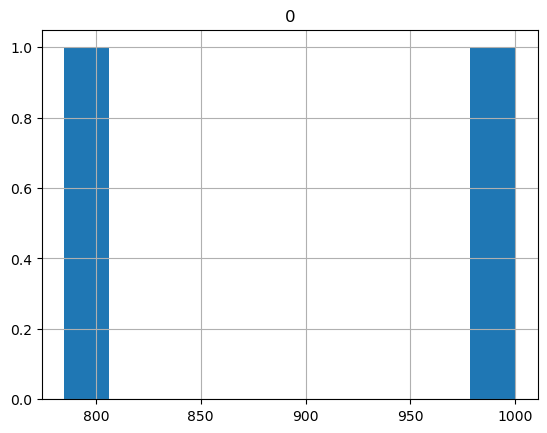

In [3]:
fashion = pd.read_csv('fashion.csv')
labels = fashion.head()

data = fashion.shape

print(labels, data)

n_data = np.ndarray(data)
n_data= pd.DataFrame(data)
n_data.hist()
print(n_data)


train_ert = data[0]
test_ert= data[1]
print(train_ert, test_ert)



Készítsen egy vizualizációt amivel megjelenti képek formájában a jellemzőket

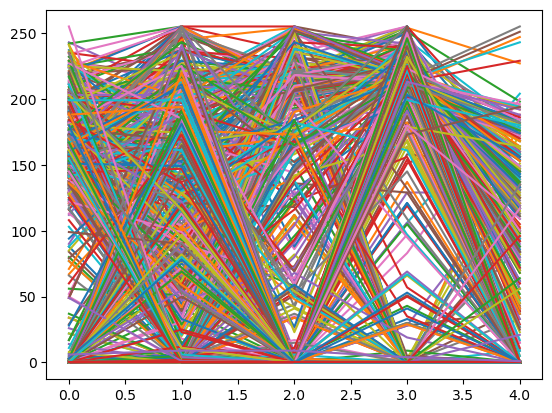

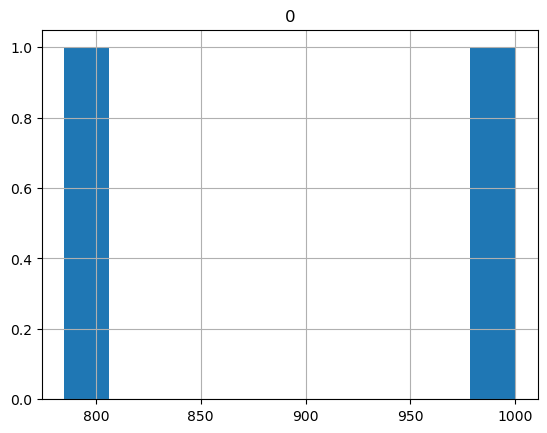

In [26]:
import numpy as np
import matplotlib.pyplot as plt


def viz(test_img, test_label, size=(28, 28)):
    plt.ylabel = test_label
    plt.axes = size
    data = fashion.shape
    train= pd.DataFrame(data)
    plt.plot(test_img)
    train.hist()
    
    plt.show

viz(labels, "kép")    

Bontsa fel az adathalmazt Tanul és teszt adathalmazra!

In [ ]:
#split_number = n_data[int(data)*0.8]
#s = train_ert
split_number = 1000
X_train = n_data[:split_number]
y_train = labels[:split_number].astype(int)

X_test = n_data[split_number:]
y_test = labels[split_number:].astype(int)

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(2, 1) (5, 785) (0, 1) (0, 785)


One hot encode-al kódolja le a célváltozólat

In [9]:
def one_hot_encode(x:np.ndarray, labels:int)-> np.ndarray:
    return np.ndarray(labels)[x]

In [7]:
y_train = one_hot_encode(y_train, 10)
y_test = one_hot_encode(y_test, 10)

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

IndexError: index 22 is out of bounds for axis 0 with size 10

In [ ]:
# 2 pont

### 4. Feladat  (2 pont)

A 3. Az előkészített adatokhoz készíts egy neurális hálózatot és tanítsd be.

<img src="    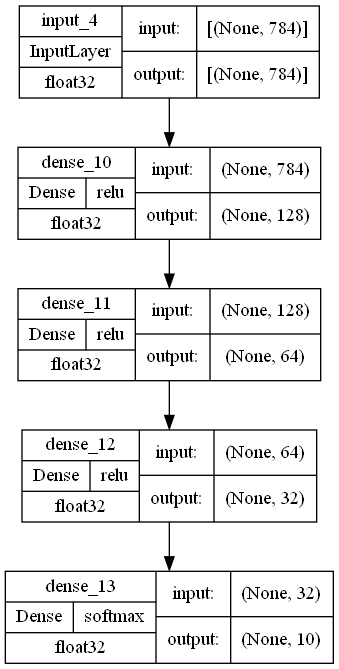" />

In [11]:
import tensorflow as tf
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax'),
])

model.compile(
    optimizer="adam", 
    loss = 'categorical_crossentropy',
    metrics= ['accuracy'], 
)

ModuleNotFoundError: No module named 'tensorflow'

#### Tanítsa be és értékelje ki a modell a következő paraméterekkel.

- batch_size = 48 
- epoch = 7

In [12]:
# Train
model.fit(X_train, y_train, batch_size= 48, epochs=7)

NameError: name 'model' is not defined

In [ ]:
# Evaluate
model.evaluate(X_test, y_test)

In [ ]:
# 2 pont

### 5. Feladat  (2 pont)

Írd meg a QLearning Agent action és learn metódusát és mutassa be egy tetszőleges példa kóddal annak működését. A következő feltételekkel:
- A learn metódus gamma paramétere tanítási ciklusonként ne változzon.
- A action epsilon paraméter tanítási ciklusonként csökkenjen.

In [18]:
import random
class QLearningAgent:
    """
    A Q-learning ügynökünket képviselő osztály
    """
    def __init__(self, n_states_row,  n_states_cols, n_actions, learning_rate):
        self.n_states_row = n_states_row
        self.n_states_cols = n_states_cols
        self.n_actions = n_actions
        self.learning_rate = learning_rate
        
        self.q_table = np.zeros((self.n_states_row, self.n_states_cols, n_actions))
    
    def act(self, state_row, state_col, epsilon):
        random_int = random.uniform(0,1)
        if random_int > epsilon:
            epsilon -= 0.0001
            return np.argmax(state_row, state_col)
        else:
            return random.randint(0, self.n_actions -1)
        
        
    
    def learn(self, state_row, state_col, action, reward, new_state_row, new_state_col, gamma=0.98):        
        old_state = self.q_table[state_row][state_col]
        new_estimate = self.q_table[new_state_row][new_state_col]
        self.q_table[state_row][state_col][action] =  reward + gamma * (new_estimate - old_state)


In [ ]:
q = QLearningAgent(4,4,3,0.98)
#q.learn(1,1,2,0.5,3,3)

ValueError: setting an array element with a sequence.

In [ ]:
# 2 pont